# Opportunity analysis of sports using log optimal betting strategy

## Load Libraries

In [1]:
import numpy as np #for numerical array data
import pandas as pd #for tabular data
import matplotlib.pyplot as plt #for plotting purposes
import cvxpy as cp
%matplotlib inline
import math
import importlib as imp
import bettingLib as bl
import time

## Figure out the minimum win prob per bet it would take to realize an expected return of .5% as a function of the number of bets you can make in a given week

In [2]:
start = time.time()
imp.reload(bl)
nVals = 50
ns = [n for n in range(1,nVals+1)]
vig = .02
probs = np.zeros(len(ns))
amountBet = np.zeros(len(ns))
cutoff = .005
for i in range(len(ns)):
    probs[i], amountBet[i] = bl.calc_breakeven_prob(vig, ns[i], cutoff=cutoff)
    if (i%10 == 0):
        print ('i = ' + str(i) + ' Time elapsed = ' + str((time.time() - start)/60.) + ' minutes')

i = 0 Time elapsed = 0.0016801675160725911 minutes
i = 10 Time elapsed = 0.07952008644739787 minutes
i = 20 Time elapsed = 0.2516085147857666 minutes
i = 30 Time elapsed = 0.5312332034111023 minutes
i = 40 Time elapsed = 0.9367334524790446 minutes


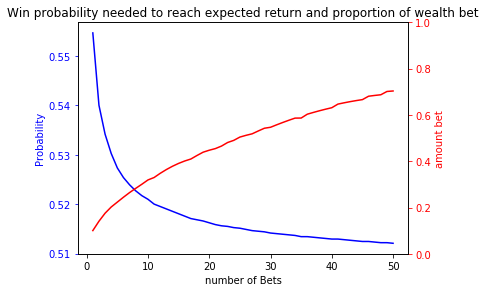

In [3]:
fig, ax1 = plt.subplots()
ax1.plot(ns, probs, 'b')
ax1.set_xlabel('number of Bets')
ax1.set_ylabel('Probability', color='b')
ax1.tick_params('y', colors='b')


ax2 = ax1.twinx()
ax2.plot(ns, amountBet, 'r')
ax2.set_ylabel('amount bet', color='r')
ax2.set_ylim(0, 1)
ax2.tick_params('y', colors='r')

fig.tight_layout()
plt.title('Win probability needed to reach expected return cutoff and proportion of wealth bet')
plt.show()

## Run Monte Carlo Simulations to figure out what the final wealth distribution is given the following quantities
* probWinningAGivenBet: probability you win a bet
* numBetsPerWeek: number of bets you can make per week
* The simulation assumes that you will bet the log optimal amount each week independent of your wealth at that point

In [156]:
probWinningAGivenBet = .55
numBetsPerWeek = 8
listOfTimeStepsToRecord = [x for x in range(0,16)]

In [157]:
imp.reload(bl)
dfProb = bl.make_df_prob(probWinningAGivenBet)
dfDistributions = bl.simulate_wealth_paths(dfProb, numBets, listOfTimeStepsToRecord, vig=.02, numSim=100000)

Here are the simulation conditions
During each time period, the player places 8 bets
Each bet has a win probability of 55.00000000000001%
Each bet made will be for 8.537160130103505% of the players wealth
Each winning bet will return 98.0% of the amount bet 
It runs 100000 independent monte-carlo simulations
It records the wealth distribution after the following time steps [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]


In [149]:
dfDistributions.head(10)

,Time 0,Time 1,Time 2,Time 3,Time 4,Time 5,Time 6,Time 7,Time 8,Time 9,Time 10,Time 11,Time 12,Time 13,Time 14,Time 15
0,1.0,1.162206,0.957814,1.113177,1.105575,0.911142,0.904919,0.898739,1.196439,1.390509,0.910920,0.750721,0.999391,0.992566,1.153566,1.145687
1,1.0,0.993170,1.154268,1.341498,1.785858,1.471787,1.461735,1.204666,1.196439,0.986027,1.312640,1.303675,1.294771,1.285928,1.494514,1.484306
2,1.0,1.162206,1.547177,1.275082,1.481908,1.972778,1.292364,1.283538,1.057808,0.514161,0.423738,0.635725,0.416462,0.554412,0.644341,0.639941
3,1.0,1.500278,1.743632,1.731723,2.012619,3.019487,2.998865,3.485299,4.050636,4.707673,6.267051,5.164893,4.256567,4.947008,5.749442,6.682036
4,1.0,0.824135,1.236431,0.809984,0.530620,0.616689,0.925205,0.762493,0.886174,0.880122,0.427795,0.569498,0.854405,0.848570,1.129652,0.930985
5,1.0,1.331242,1.772205,1.760101,2.045600,2.377409,1.959305,2.277116,2.261564,1.863833,1.536049,1.525558,2.030887,2.703601,3.142141,3.120682
6,1.0,1.162206,1.350723,1.113177,1.105575,1.284906,1.493325,1.735551,1.136957,0.552633,0.642273,0.529320,0.436231,0.506990,0.589227,0.684803
7,1.0,0.824135,0.818506,0.812916,1.219599,1.623581,1.338050,1.781267,2.070200,1.006247,0.999375,1.161480,0.957216,0.950678,1.104884,1.284103
8,1.0,1.162206,1.547177,1.798139,1.481908,1.722283,2.292775,3.439798,2.834857,1.857111,1.844427,1.831830,2.438609,2.421954,1.996016,2.657180
9,1.0,1.162206,1.350723,1.798139,1.481908,1.972778,1.959305,1.945923,2.261564,3.010688,3.499040,2.883679,4.326320,4.296772,3.541118,3.516933


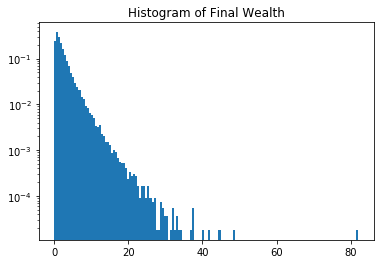

In [150]:
plt.hist(dfDistributions['Time 15'], bins = 150,density=True,log=True)
plt.title('Histogram of Final Wealth')
plt.show()

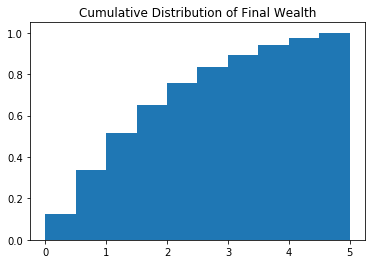

In [151]:
plt.hist(dfDistributions['Time 15'], range=(0,5), density=True, cumulative=True)
plt.title('Cumulative Distribution of Final Wealth')
plt.show()

In [158]:
print('Probability you make money = ')
print(100*dfDistributions[dfDistributions['Time 15'] >= 1].shape[0]/dfDistributions['Time 15'].shape[0])

Probability you make money = 
70.184


In [159]:
print('Average final wealth as a proportion of initial wealth = ')
print(dfDistributions['Time 15'].mean())

Average final wealth as a proportion of initial wealth = 
2.431677408506421
